In [2]:
import pandas as pd
import numpy as np
import math

In [3]:
nsrdb_metadata_2015 = pd.read_csv('NSRDB/177496_42.37_-124.10_2015.csv', nrows=1).T
nsrdb_metadata_2016 = pd.read_csv('NSRDB/177496_42.37_-124.10_2016.csv', nrows=1).T
nsrdb_metadata_2017 = pd.read_csv('NSRDB/177496_42.37_-124.10_2017.csv', nrows=1).T
nsrdb_metadata_2018 = pd.read_csv('NSRDB/177496_42.37_-124.10_2018.csv', nrows=1).T
nsrdb_metadata_2015

,0
Source,NSRDB
Location ID,177496
City,-
State,-
Country,-
Latitude,42.37
Longitude,-124.1
Time Zone,-8
Elevation,710
Local Time Zone,-8


In [3]:
nsrdb_2015 = pd.read_csv('NSRDB/177496_42.37_-124.10_2015.csv', skiprows=2)
nsrdb_2016 = pd.read_csv('NSRDB/177496_42.37_-124.10_2016.csv', skiprows=2)
nsrdb_2017 = pd.read_csv('NSRDB/177496_42.37_-124.10_2017.csv', skiprows=2)
nsrdb_2018 = pd.read_csv('NSRDB/177496_42.37_-124.10_2018.csv', skiprows=2)
nsrdb_2016.iloc[:10,:10]

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI
0,2016,1,1,0,0,0,0,0,0,0
1,2016,1,1,0,30,0,0,0,0,0
2,2016,1,1,1,0,0,0,0,0,0
3,2016,1,1,1,30,0,0,0,0,0
4,2016,1,1,2,0,0,0,0,0,0
5,2016,1,1,2,30,0,0,0,0,0
6,2016,1,1,3,0,0,0,0,0,0
7,2016,1,1,3,30,0,0,0,0,0
8,2016,1,1,4,0,0,0,0,0,0
9,2016,1,1,4,30,0,0,0,0,0


In [4]:
nsrdb_2016.iloc[:10,10:]

,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm),Unnamed: 24
0,0,1,-5,160.23,0,0.866,3.1,0.164,104.4,69.15,-1,950,0.0,0.0,NaN
1,0,1,-5,160.54,0,0.866,3.0,0.165,104.4,69.14,-1,950,0.0,0.0,NaN
2,0,4,-6,158.92,0,0.866,2.9,0.167,101.9,67.44,-2,950,0.0,0.0,NaN
3,0,1,-6,155.75,0,0.866,2.8,0.170,101.9,67.44,-2,950,0.0,0.0,NaN
4,0,4,-6,151.57,0,0.866,2.7,0.174,100.1,66.39,-2,950,0.0,0.0,NaN
5,0,4,-6,146.78,0,0.866,2.6,0.178,100.1,66.38,-2,950,0.0,0.0,NaN
6,0,1,-6,141.61,0,0.866,2.6,0.182,100.1,65.70,-2,950,0.0,0.0,NaN
7,0,4,-6,136.24,0,0.866,2.6,0.185,100.1,65.68,-2,950,0.0,0.0,NaN
8,0,4,-6,130.76,0,0.866,2.6,0.189,101.8,65.24,-2,950,0.0,0.0,NaN
9,0,4,-6,125.22,0,0.866,2.6,0.192,101.8,65.23,-2,950,0.0,0.0,NaN


### Solar

In [5]:
solar_2015 = nsrdb_2015.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2016 = nsrdb_2016.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2017 = nsrdb_2017.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]
solar_2018 = nsrdb_2018.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'Clearsky GHI']]

In [6]:
#solar_2018

In [7]:
solar_df = pd.concat([solar_2015, solar_2016, solar_2017, solar_2018], ignore_index=True)
solar_df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI
0,2015,1,1,0,0,0,0
1,2015,1,1,0,30,0,0
2,2015,1,1,1,0,0,0
3,2015,1,1,1,30,0,0
4,2015,1,1,2,0,0,0
...,...,...,...,...,...,...,...
70075,2018,12,31,21,30,0,0
70076,2018,12,31,22,0,0,0
70077,2018,12,31,22,30,0,0
70078,2018,12,31,23,0,0,0


In [8]:
solar_df['timestamp'] = pd.to_datetime(solar_df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [9]:
solar_df = solar_df[['timestamp', 'GHI', 'Clearsky GHI']]

In [10]:
solar_df

,timestamp,GHI,Clearsky GHI
0,2015-01-01 00:00:00,0,0
1,2015-01-01 00:30:00,0,0
2,2015-01-01 01:00:00,0,0
3,2015-01-01 01:30:00,0,0
4,2015-01-01 02:00:00,0,0
...,...,...,...
70075,2018-12-31 21:30:00,0,0
70076,2018-12-31 22:00:00,0,0
70077,2018-12-31 22:30:00,0,0
70078,2018-12-31 23:00:00,0,0


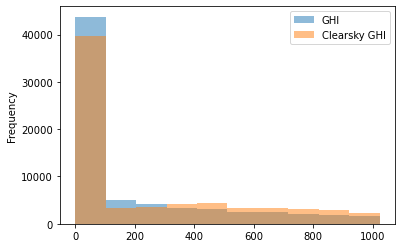

In [11]:
ax = solar_df[['GHI','Clearsky GHI']].plot.hist(alpha=0.5)

In [12]:
solar_df['GHI_KWh'] = solar_df['GHI'] * 0.5 / 1000
solar_df['Clearsky GHI_KWh'] = solar_df['Clearsky GHI'] * 0.5 / 1000

<ipython-input-12-7f72f59d19c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['GHI_KWh'] = solar_df['GHI'] * 0.5 / 1000
<ipython-input-12-7f72f59d19c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['Clearsky GHI_KWh'] = solar_df['Clearsky GHI'] * 0.5 / 1000


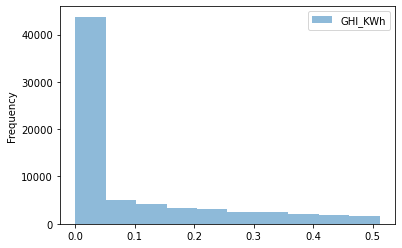

In [13]:
ax = solar_df[['GHI_KWh']].plot.hist(alpha=0.5)

In [14]:
#ax = solar_df[['GHI_KWh','Clearsky GHI_KWh']].plot.hist(alpha=0.5)

In [15]:
solar_df['Solar Energy'] = solar_df['GHI_KWh'] * 2 * 3 * 0.2
solar_df['Clearsky Solar Energy'] = solar_df['Clearsky GHI_KWh']  * 2 * 3 * 0.2

<ipython-input-15-8b999169b131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['Solar Energy'] = solar_df['GHI_KWh'] * 2 * 3 * 0.2
<ipython-input-15-8b999169b131>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar_df['Clearsky Solar Energy'] = solar_df['Clearsky GHI_KWh']  * 2 * 3 * 0.2


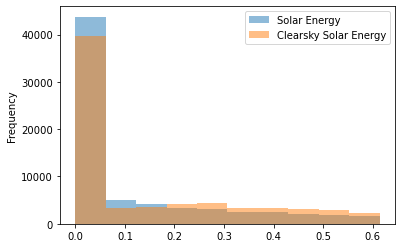

In [16]:
ax = solar_df[['Solar Energy', 'Clearsky Solar Energy']].plot.hist(alpha=0.5)

In [17]:
solar_df

,timestamp,GHI,Clearsky GHI,GHI_KWh,Clearsky GHI_KWh,Solar Energy,Clearsky Solar Energy
0,2015-01-01 00:00:00,0,0,0.0,0.0,0.0,0.0
1,2015-01-01 00:30:00,0,0,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,0,0,0.0,0.0,0.0,0.0
3,2015-01-01 01:30:00,0,0,0.0,0.0,0.0,0.0
4,2015-01-01 02:00:00,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
70075,2018-12-31 21:30:00,0,0,0.0,0.0,0.0,0.0
70076,2018-12-31 22:00:00,0,0,0.0,0.0,0.0,0.0
70077,2018-12-31 22:30:00,0,0,0.0,0.0,0.0,0.0
70078,2018-12-31 23:00:00,0,0,0.0,0.0,0.0,0.0


### Wind Energy

https://www.thoughtco.com/density-of-air-at-stp-607546

https://www.google.com/search?q=mbar+to+Pa&oq=mbar+to+Pa&aqs=chrome..69i57j6j0i512l2j0i10i512j0i512j0i10i512.3157j0j7&sourceid=chrome&ie=UTF-8

https://www.toppr.com/guides/physics/fundamentals/density-of-air-how-to-calculate-air-density/#:~:text=Additionally%2C%20the%20IUPAC%20standard%20of,degrees%20C%20and%20100%20kPa


In [18]:
nsrdb_metadata_2018[nsrdb_metadata_2018.index.isin(['Wind Speed', 'Temperature Units', 'Pressure Units'])]

,0
Temperature Units,c
Pressure Units,mbar
Wind Speed,m/s


In [19]:
nsrdb = pd.concat([nsrdb_2015, nsrdb_2016, nsrdb_2017, nsrdb_2018], ignore_index=True)
wind_df = nsrdb.loc[:,['Year', 'Month', 'Day', 'Hour', 'Minute', 'Wind Speed', 'Temperature', 'Pressure']]
wind_df['timestamp'] = pd.to_datetime(wind_df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
wind_df = wind_df[['timestamp', 'Pressure', 'Temperature', 'Wind Speed']]
wind_df

,timestamp,Pressure,Temperature,Wind Speed
0,2015-01-01 00:00:00,950,0.0,3.1
1,2015-01-01 00:30:00,950,0.0,3.1
2,2015-01-01 01:00:00,950,0.0,3.1
3,2015-01-01 01:30:00,950,0.0,3.1
4,2015-01-01 02:00:00,950,0.0,3.1
...,...,...,...,...
70075,2018-12-31 21:30:00,969,9.2,1.4
70076,2018-12-31 22:00:00,970,9.2,1.4
70077,2018-12-31 22:30:00,970,9.2,1.3
70078,2018-12-31 23:00:00,970,9.2,1.3


In [20]:
# Changing Pressure values to Pa from mbar
wind_df['Pressure'] = wind_df['Pressure'] * 100
# Converting Temperature to Kelvin
wind_df['Temperature'] = wind_df['Temperature'] + 273.15
# Wind speed is in m/s
# R is the specific gas constant for dry air in J/ (kg.K)
R = 287.058

In [21]:
wind_df

,timestamp,Pressure,Temperature,Wind Speed
0,2015-01-01 00:00:00,95000,273.15,3.1
1,2015-01-01 00:30:00,95000,273.15,3.1
2,2015-01-01 01:00:00,95000,273.15,3.1
3,2015-01-01 01:30:00,95000,273.15,3.1
4,2015-01-01 02:00:00,95000,273.15,3.1
...,...,...,...,...
70075,2018-12-31 21:30:00,96900,282.35,1.4
70076,2018-12-31 22:00:00,97000,282.35,1.4
70077,2018-12-31 22:30:00,97000,282.35,1.3
70078,2018-12-31 23:00:00,97000,282.35,1.3


In [22]:
# Air density = p/(R.T) 
# Air density in kg/m^3
wind_df['Air Density'] = wind_df['Pressure'] / (R * wind_df['Temperature'])
wind_df

,timestamp,Pressure,Temperature,Wind Speed,Air Density
0,2015-01-01 00:00:00,95000,273.15,3.1,1.211582
1,2015-01-01 00:30:00,95000,273.15,3.1,1.211582
2,2015-01-01 01:00:00,95000,273.15,3.1,1.211582
3,2015-01-01 01:30:00,95000,273.15,3.1,1.211582
4,2015-01-01 02:00:00,95000,273.15,3.1,1.211582
...,...,...,...,...,...
70075,2018-12-31 21:30:00,96900,282.35,1.4,1.195546
70076,2018-12-31 22:00:00,97000,282.35,1.4,1.196780
70077,2018-12-31 22:30:00,97000,282.35,1.3,1.196780
70078,2018-12-31 23:00:00,97000,282.35,1.3,1.196780


In [23]:
# A = pi * r ^ 2
# r = 44m
# A is in m^2
A = math.pi * 44 ** 2
A

6082.12337734984

#### Assumption for Cp 

https://greenliving.lovetoknow.com/Efficiency_of_Wind_Energy#:~:text=Wind%20energy%2C%20also%20known%20as,is%20between%2035%2D45%25

Research paper: Wind Turbine Power Calculations RWE npower renewables

In [24]:
# Power Coeffecient, Cp = ηWind =  0.4
Cp = 0.4

In [25]:
# Research paper: Wind Turbine Power Calculations RWE npower renewables
# P = (1/2) * air density * A * v^3 * Cp in watt
wind_df ['Wind Power'] = 0.5 * wind_df['Air Density'] * A * (wind_df['Wind Speed'] ** 3) * Cp

In [26]:
wind_df['Wind Energy'] = 0.5 * wind_df ['Wind Power'] / 1000
wind_df = wind_df[['timestamp', 'Wind Power', 'Wind Energy']]
wind_df

,timestamp,Wind Power,Wind Energy
0,2015-01-01 00:00:00,43905.916647,21.952958
1,2015-01-01 00:30:00,43905.916647,21.952958
2,2015-01-01 01:00:00,43905.916647,21.952958
3,2015-01-01 01:30:00,43905.916647,21.952958
4,2015-01-01 02:00:00,43905.916647,21.952958
...,...,...,...
70075,2018-12-31 21:30:00,3990.576665,1.995288
70076,2018-12-31 22:00:00,3994.694907,1.997347
70077,2018-12-31 22:30:00,3198.376352,1.599188
70078,2018-12-31 23:00:00,3198.376352,1.599188


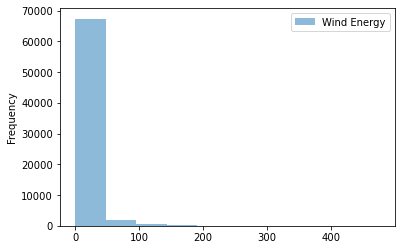

In [27]:
ax = wind_df[['Wind Energy']].plot.hist(alpha=0.5)

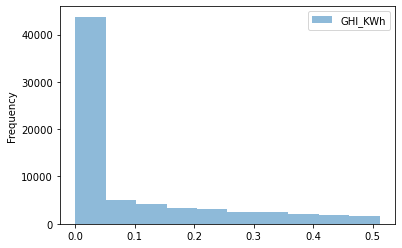

In [28]:
ax = solar_df[['GHI_KWh']].plot.hist(alpha=0.5)

In [29]:
21 / 0.5

42.0

### Creating cumulative datasets

In [30]:
solar_df = solar_df.set_index('timestamp')[['Solar Energy', 'Clearsky Solar Energy']]

In [31]:
wind_df = wind_df.set_index('timestamp')

In [32]:
wind_df

,Wind Power,Wind Energy
timestamp,,
2015-01-01 00:00:00,43905.916647,21.952958
2015-01-01 00:30:00,43905.916647,21.952958
2015-01-01 01:00:00,43905.916647,21.952958
2015-01-01 01:30:00,43905.916647,21.952958
2015-01-01 02:00:00,43905.916647,21.952958
...,...,...
2018-12-31 21:30:00,3990.576665,1.995288
2018-12-31 22:00:00,3994.694907,1.997347
2018-12-31 22:30:00,3198.376352,1.599188


In [33]:
solar_df

,Solar Energy,Clearsky Solar Energy
timestamp,,
2015-01-01 00:00:00,0.0,0.0
2015-01-01 00:30:00,0.0,0.0
2015-01-01 01:00:00,0.0,0.0
2015-01-01 01:30:00,0.0,0.0
2015-01-01 02:00:00,0.0,0.0
...,...,...
2018-12-31 21:30:00,0.0,0.0
2018-12-31 22:00:00,0.0,0.0
2018-12-31 22:30:00,0.0,0.0


In [37]:
energy_generation_df = solar_df.join(wind_df)[['Wind Energy', 'Solar Energy']]

In [40]:
energy_generation_df.sample(50)
# All values in KWh

,Wind Energy,Solar Energy
timestamp,,
2017-08-15 13:00:00,7.160935,0.5418
2017-02-03 08:30:00,59.915049,0.0012
2016-07-09 22:30:00,0.713393,0.0000
2017-12-27 03:30:00,4.190213,0.0000
2016-03-05 20:00:00,44.531031,0.0000
2016-01-31 22:30:00,24.058628,0.0000
2016-12-12 21:00:00,8.900680,0.0000
2018-09-05 01:00:00,1.569325,0.0000
2016-06-12 16:00:00,16.861118,0.3900
